# Plot clustermap hallmark gene set overlaps

Script related to figure s1f

### Aim:
- Plot clustermap of hallmark gene set overlaps

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [6]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load hallmark overlap data

In [7]:
file_hallmarks_overlap = home + "/Data/1/Hallmark_geneset_overlap.txt"

hallmarks_overlap = pd.read_csv(file_hallmarks_overlap, sep='\t')

In [8]:
hallmarks_overlap.head()

,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature
HALLMARK_TNFA_SIGNALING_VIA_NFKB,1.000000,0.145000,0.080000,0.010,0.046512,0.181818,0.204545,0.006623,0.025000,0.179012,...,0.105000,0.008850,0.009524,0.095000,0.000000,0.115000,0.040,0.00000,0.014085,0.070423
HALLMARK_HYPOXIA,0.145000,1.000000,0.093333,0.005,0.023256,0.054545,0.045455,0.000000,0.015000,0.092593,...,0.080000,0.017699,0.019048,0.020000,0.029412,0.055000,0.015,0.04878,0.014085,0.021127
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.080000,0.093333,1.000000,0.000,0.093023,0.036364,0.040000,0.013333,0.026667,0.120000,...,0.040000,0.053333,0.053333,0.000000,0.013333,0.026667,0.000,0.02439,0.013333,0.013333
HALLMARK_MITOTIC_SPINDLE,0.010000,0.005000,0.000000,1.000,0.000000,0.036364,0.000000,0.006623,0.195000,0.043210,...,0.010000,0.000000,0.009524,0.015000,0.051471,0.010000,0.005,0.00000,0.000000,0.007042
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.046512,0.023256,0.093023,0.000,1.000000,0.069767,0.023256,0.046512,0.046512,0.116279,...,0.069767,0.023256,0.023256,0.023256,0.023256,0.046512,0.000,0.02439,0.023256,0.023256


## Plot clustermap

### Generate discrete colormap

In [9]:
def cmap_discretize(cmap, N):
    
    """
    Return a discrete colormap from the continuous colormap cmap.
    
    cmap: colormap instance, eg. cm.jet. 
    N: number of colors.
    """
    
    if type(cmap) == str:
        
        cmap = get_cmap(cmap)
    
    colors_i = np.concatenate((np.linspace(0,1.,N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0,1.,N+1)
    cdict = {}
    
    for ki, key in enumerate(('red','green','blue')):
        
        cdict[key] = [(indices[i],colors_rgba[i-1,ki],
                       colors_rgba[i,ki]) for i in range(N+1)]
        
    # Return colormap object.
    return mpl.colors.LinearSegmentedColormap(cmap.name+"_%d"%N,cdict,1024)

In [10]:
discretized_cmap = cmap_discretize(mpl.cm.hot_r,10)

### Define gene set colors

In [11]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'HALLMARK_INTERFERON_ALPHA_RESPONSE':           GREEN,
'HALLMARK_INTERFERON_GAMMA_RESPONSE':           GREEN,
'ImmuneSignature':                              GREEN,
'HALLMARK_E2F_TARGETS':                         RED,
'HALLMARK_SPERMATOGENESIS':                     GREY,
'HALLMARK_INFLAMMATORY_RESPONSE':               GREEN,
'HALLMARK_G2M_CHECKPOINT':                      RED,
'HALLMARK_PANCREAS_BETA_CELLS':                 GREY,
'HALLMARK_OXIDATIVE_PHOSPHORYLATION':           GREY,
'HALLMARK_MYC_TARGETS_V1':                      RED,
'HALLMARK_FATTY_ACID_METABOLISM':               GREY,
'HALLMARK_PEROXISOME':                          GREY,
'HALLMARK_DNA_REPAIR':                          RED,
'HALLMARK_UNFOLDED_PROTEIN_RESPONSE':           'purple',
'HALLMARK_KRAS_SIGNALING_DN':                   RED,
'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY':     'purple',
'HALLMARK_CHOLESTEROL_HOMEOSTASIS':             GREY,
'HALLMARK_COMPLEMENT':                          GREEN,
'HALLMARK_MTORC1_SIGNALING':                    RED,
'HALLMARK_IL2_STAT5_SIGNALING':                 GREEN,
'HALLMARK_ADIPOGENESIS':                        GREY,
'HALLMARK_KRAS_SIGNALING_UP':                   RED,
'HALLMARK_HEME_METABOLISM':                     GREY,
'HALLMARK_PI3K_AKT_MTOR_SIGNALING':             RED,
'HALLMARK_ANDROGEN_RESPONSE':                   GREY,
'HALLMARK_PROTEIN_SECRETION':                   GREY,
'HALLMARK_P53_PATHWAY':                         RED,
'HALLMARK_UV_RESPONSE_UP':                      'purple',
'HALLMARK_MYC_TARGETS_V2':                      RED,
'StromalSignature':                             BLUE,
'HALLMARK_MITOTIC_SPINDLE':                     RED,
'HALLMARK_GLYCOLYSIS':                          RED,
'HALLMARK_APICAL_JUNCTION':                     BLUE,
'HALLMARK_HYPOXIA':                             'purple',
'HALLMARK_TNFA_SIGNALING_VIA_NFKB':             GREEN,
'HALLMARK_APOPTOSIS':                           GREY,
'HALLMARK_APICAL_SURFACE':                      GREY,
'HALLMARK_UV_RESPONSE_DN':                      'purple',
'HALLMARK_TGF_BETA_SIGNALING':                  'purple',
'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':   BLUE,
'HALLMARK_NOTCH_SIGNALING':                     RED,
'HALLMARK_WNT_BETA_CATENIN_SIGNALING':          RED,
'HALLMARK_ALLOGRAFT_REJECTION':                 GREEN,
'HALLMARK_XENOBIOTIC_METABOLISM':               GREY,
'HALLMARK_ANGIOGENESIS':                        BLUE,
'HALLMARK_BILE_ACID_METABOLISM':                GREY,
'HALLMARK_COAGULATION':                         GREY,
'HALLMARK_ESTROGEN_RESPONSE_EARLY':             GREY,
'HALLMARK_ESTROGEN_RESPONSE_LATE':              GREY,
'HALLMARK_HEDGEHOG_SIGNALING':                  RED,
'HALLMARK_IL6_JAK_STAT3_SIGNALING':             GREEN,
'HALLMARK_MYOGENESIS':                          GREY,
'TumourCellularity_mRNA':                       'k'
}

In [9]:
color_sets_df = pd.DataFrame.from_dict(color_sets, orient='index')

In [10]:
color_sets_df.head()

,0
HALLMARK_INTERFERON_ALPHA_RESPONSE,#007F00
HALLMARK_INTERFERON_GAMMA_RESPONSE,#007F00
ImmuneSignature,#007F00
HALLMARK_E2F_TARGETS,#CC0000
HALLMARK_SPERMATOGENESIS,#D3D3D3


### Plot

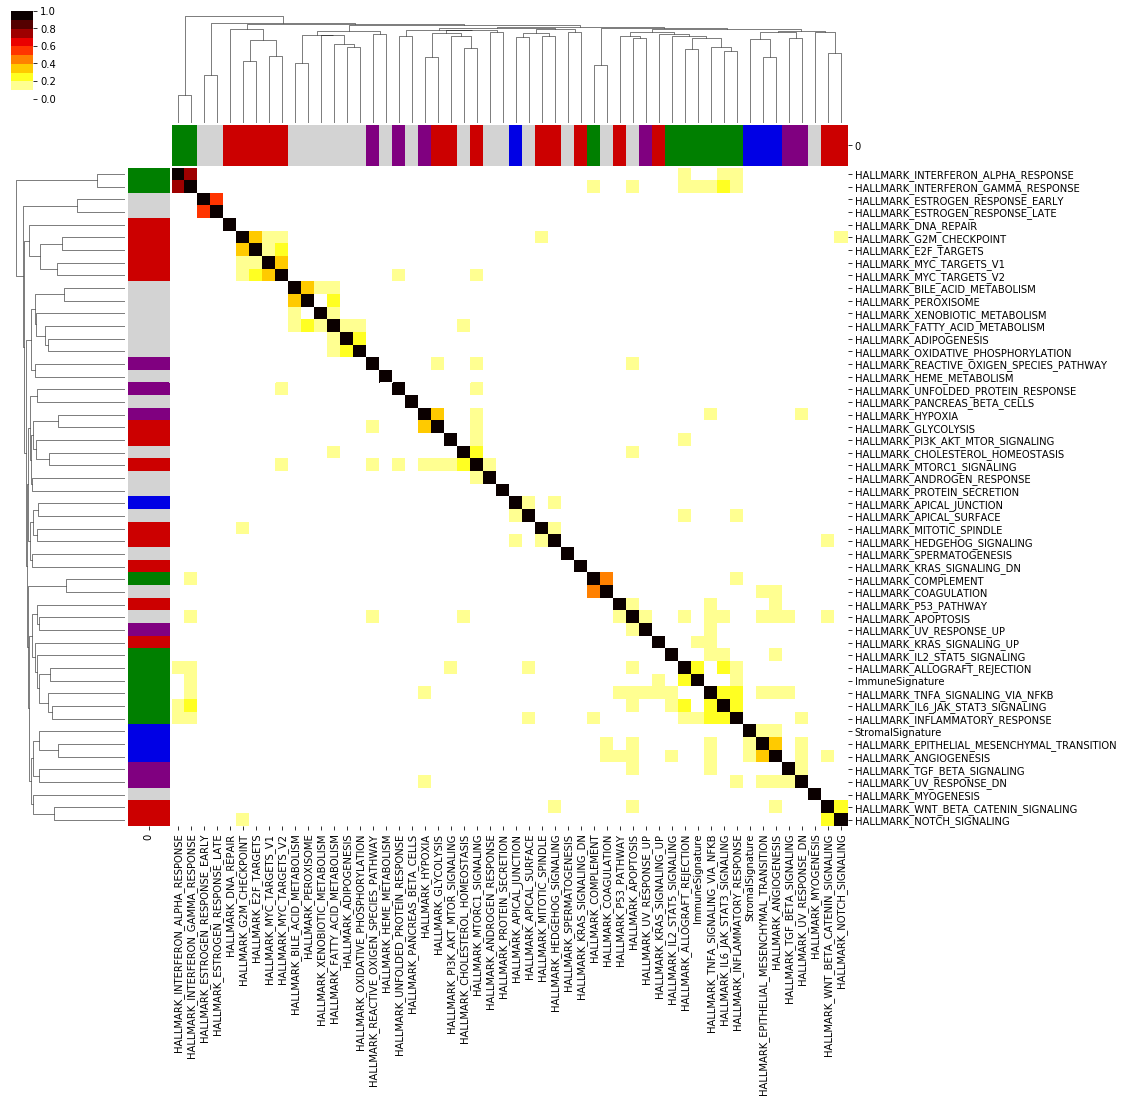

In [11]:
g = sns.clustermap(hallmarks_overlap,
                   cmap=discretized_cmap,
                   figsize=(15,15),
                   row_cluster=True,
                   col_cluster=True,
                   row_colors=color_sets_df[0],
                   col_colors=color_sets_df[0],
                   linewidths=0.0, rasterized=True
                  )

### Save plot

In [12]:
ls ../../Figures/main/1/

OVCT_Fig_m1.pdf  OVCT_Fig_m1.png  README.md        panels/


In [14]:
FILE = "../../Figures/supplementary/1/panels/s1f_hallmark_overlap_clustermap.pdf"

g.savefig(FILE, bbox='tight')

# End script